In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [115]:
pd.set_option('display.max_columns',150)

In [4]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [5]:
def get_name(df_column):
    df_column_name = df_column.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
    have_name= df_column_name.map(lambda x :0 if x=='' else 1)
    return df_column_name,have_name

In [6]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [10]:
train['belongs_to_collection'],train['has_collection']=get_name(train.belongs_to_collection)

In [13]:
test['belongs_to_collection'],test['has_collection']=get_name(test.belongs_to_collection)

In [11]:
train['has_collection'].value_counts()

0    2396
1     604
Name: has_collection, dtype: int64

In [12]:
train[['has_collection','belongs_to_collection']].head(10)

,has_collection,belongs_to_collection
0,1,Hot Tub Time Machine Collection
1,1,The Princess Diaries Collection
2,0,
3,0,
4,0,
5,0,
6,0,
7,0,
8,1,The Muppet Collection
9,0,


In [14]:
train['genres'],train['has_genres']=get_name(train.genres)
test['genres'],test['has_genres']=get_name(test.genres)

In [15]:
train['production_companies'],train['has_companies']=get_name(train.production_companies)
test['production_companies'],test['has_companies']=get_name(test.production_companies)

In [16]:
train['production_countries'],train['has_countries']=get_name(train.production_countries)
test['production_countries'],test['has_countries']=get_name(test.production_countries)

In [17]:
train['spoken_languages'],train['has_languages']=get_name(train.spoken_languages)
test['spoken_languages'],test['has_languages']=get_name(test.spoken_languages)

In [18]:
train['Keywords'],train['has_Keywords']=get_name(train.Keywords)
test['Keywords'],test['has_Keywords']=get_name(test.Keywords)

In [20]:
train['cast'][0]

"[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character

In [22]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'has_collection', 'has_genres', 'has_companies', 'has_countries',
       'has_languages', 'has_Keywords'],
      dtype='object')

In [28]:
train.has_collection.value_counts()

0    2396
1     604
Name: has_collection, dtype: int64

In [29]:
train.has_genres.value_counts()

1    2993
0       7
Name: has_genres, dtype: int64

In [30]:
train.has_companies.value_counts()

1    2844
0     156
Name: has_companies, dtype: int64

In [31]:
train.has_countries.value_counts()

1    2945
0      55
Name: has_countries, dtype: int64

In [32]:
train.has_languages.value_counts()

1    2974
0      26
Name: has_languages, dtype: int64

In [33]:
train.has_Keywords.value_counts()

1    2724
0     276
Name: has_Keywords, dtype: int64

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  3000 non-null   object 
 2   budget                 3000 non-null   int64  
 3   genres                 3000 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   3000 non-null   object 
 12  production_countries   3000 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [40]:
train[train['runtime']!=train['runtime']]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,has_collection,has_genres,has_companies,has_countries,has_languages,has_Keywords
1335,1336,,6000000,Drama,NaN,tt1107828,ru,Королёв,NaN,0.292296,/2XcRiIvliLUUGqv5qOvpc76WeCU.jpg,,,10/29/07,NaN,,Released,NaN,Королёв,,"[{'cast_id': 3, 'character': '–°–µ—Ä–≥–µ–π –ö–...","[{'credit_id': '52fe4db29251416c7513d819', 'de...",31000,0,1,0,0,0,0
2302,2303,,0,Comedy,NaN,tt0116485,de,Happy Weekend,NaN,0.002229,NaN,Senator Film Produktion,Germany,3/14/96,NaN,Deutsch,Released,NaN,Happy Weekend,"adultery,bisexuality,group sex,sex","[{'cast_id': 0, 'character': 'Joachim Krippo',...",NaN,65335,0,1,1,1,1,1


In [41]:
train.isna().sum()

id                          0
belongs_to_collection       0
budget                      0
genres                      0
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies        0
production_countries        0
release_date                0
runtime                     2
spoken_languages            0
status                      0
tagline                   597
title                       0
Keywords                    0
cast                       13
crew                       16
revenue                     0
has_collection              0
has_genres                  0
has_companies               0
has_countries               0
has_languages               0
has_Keywords                0
dtype: int64

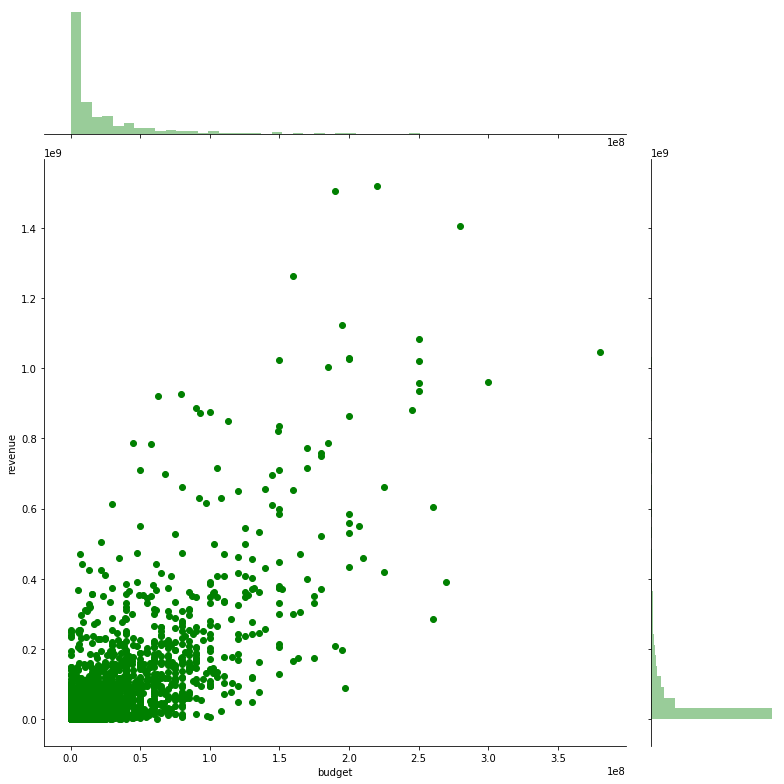

In [42]:
sns.jointplot(x="budget", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

In [43]:
train['release_date'] = pd.to_datetime(train['release_date']) 

In [68]:
test['release_date'] = pd.to_datetime(test['release_date']) 

In [44]:
train['release_date'].head()

0   2015-02-20
1   2004-08-06
2   2014-10-10
3   2012-03-09
4   2009-02-05
Name: release_date, dtype: datetime64[ns]

In [52]:
year=train['release_date'].dt.year
month=train['release_date'].dt.month
day=train['release_date'].dt.day

In [69]:
test['year']=test['release_date'].dt.year.map(lambda x:x-100 if x>2019 else x)
test['month']=test['release_date'].dt.month
test['day']=test['release_date'].dt.day

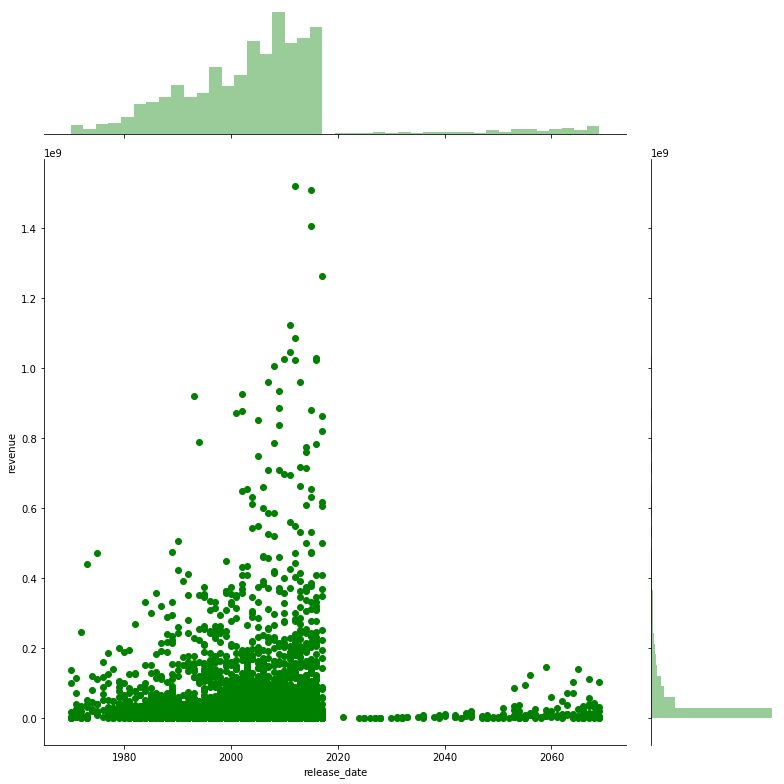

In [49]:
sns.jointplot(x=year, y='revenue', data=train, height=11, ratio=4, color="g")
plt.show()

In [66]:
train['year']=year.map(lambda x: x-100 if x>2019 else x)
train['month']=month
train['day']=day

In [67]:
train[['year','month','day']]

,year,month,day
0,2015,2,20
1,2004,8,6
2,2014,10,10
3,2012,3,9
4,2009,2,5
...,...,...,...
2995,1994,4,22
2996,2013,3,28
2997,1996,10,11
2998,2004,1,16


In [71]:
train["release_date_corr"] = pd.to_datetime(train[['year', 'month', 'day']])
test["release_date_corr"] = pd.to_datetime(test[['year', 'month', 'day']])


In [75]:
train[train['release_date'].dt.year>2019][['release_date','release_date_corr']]

,release_date,release_date_corr
39,2065-04-07,1965-04-07
41,2067-06-22,1967-06-22
51,2065-07-01,1965-07-01
61,2056-05-30,1956-05-30
68,2062-12-25,1962-12-25
...,...,...
2932,2066-12-20,1966-12-20
2945,2063-10-06,1963-10-06
2946,2027-10-31,1927-10-31
2967,2061-09-25,1961-09-25


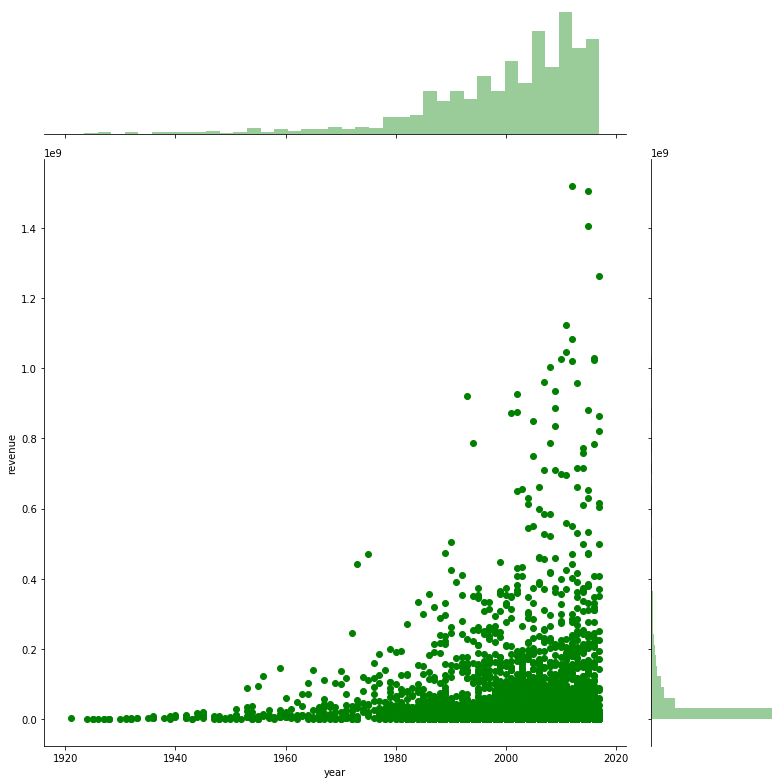

In [77]:
sns.jointplot(x='year', y='revenue', data = train,height=11, ratio=4, color="g")
plt.show()

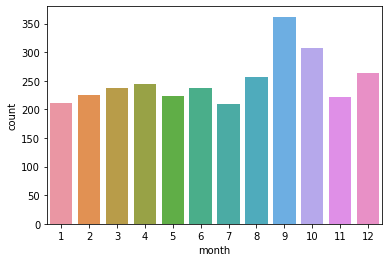

In [78]:
sns.countplot(train['month'].sort_values())

In [79]:
train['release_dayofweek'] = train['release_date_corr'].dt.dayofweek
test['release_dayofweek'] = test['release_date_corr'].dt.dayofweek


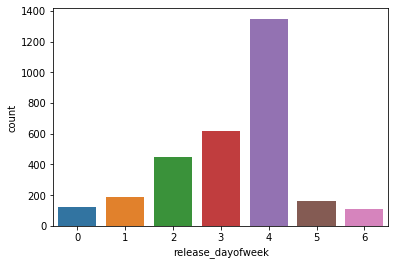

In [80]:
sns.countplot(train['release_dayofweek'].sort_values())


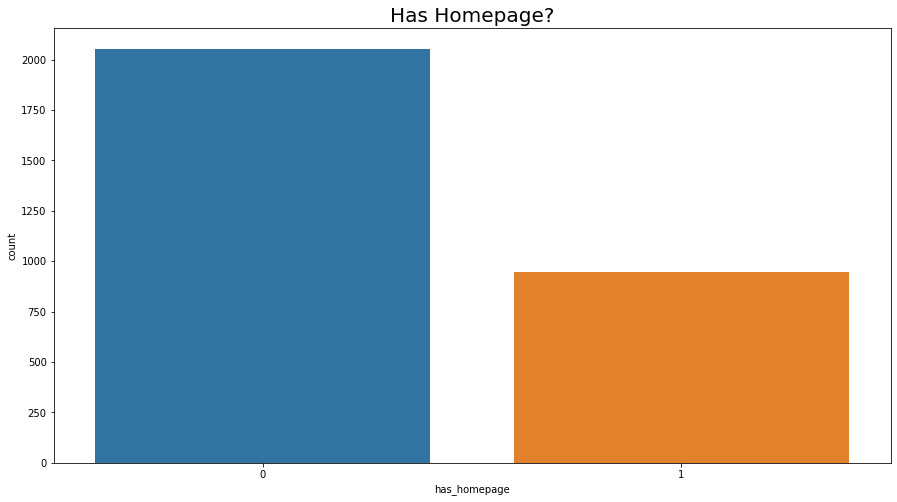

In [81]:
train['has_homepage'] = 1
train.loc[pd.isnull(train['homepage']) ,"has_homepage"] = 0
plt.figure(figsize=(15,8))
sns.countplot(train['has_homepage'].sort_values())
plt.title("Has Homepage?",fontsize=20)
plt.show()

In [82]:
test['has_homepage'] = 1
test.loc[pd.isnull(test['homepage']) ,"has_homepage"] = 0

In [83]:
test['isTaglineNA'] = 0
test.loc[pd.isnull(test['tagline']) ,"isTaglineNA"] = 1
train['isTaglineNA'] = 0
train.loc[pd.isnull(train['tagline']) ,"isTaglineNA"] = 1

In [84]:
train['isTitleDifferent'] = 1
train.loc[ train['original_title'] == train['title'] ,"isTitleDifferent"] = 0
test['isTitleDifferent'] = 1
test.loc[ test['original_title'] == test['title'] ,"isTitleDifferent"] = 0

In [89]:
genres = train.genres.str.get_dummies(sep=',')

In [92]:
test = pd.concat([test, test.genres.str.get_dummies(sep=',')], axis=1, sort=False)

In [91]:
train = pd.concat([train, train.genres.str.get_dummies(sep=',')], axis=1, sort=False)

In [93]:
train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,has_collection,has_genres,has_companies,has_countries,has_languages,has_Keywords,year,month,day,release_date_corr,release_dayofweek,has_homepage,isTaglineNA,isTitleDifferent,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,Hot Tub Time Machine Collection,14000000,Comedy,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"Metro-Goldwyn-Mayer (MGM),Paramount Pictures,U...",United States of America,2015-02-20,93.0,English,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"duringcreditsstinger,hot tub,sequel,time travel","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,1,1,1,1,1,2015,2,20,2015-02-20,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,The Princess Diaries Collection,40000000,"Comedy,Drama,Family,Romance",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,Walt Disney Pictures,United States of America,2004-08-06,113.0,English,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"coronation,duty,falling in love,marriage","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,1,1,1,1,1,2004,8,6,2004-08-06,4,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0


In [94]:
train = pd.concat([train, train.belongs_to_collection.str.get_dummies(sep=',')], axis=1, sort=False)
test = pd.concat([test, test.belongs_to_collection.str.get_dummies(sep=',')], axis=1, sort=False)

In [99]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity',
       ...
       'Wonder Woman Collection', 'World War Z Collection',
       'World of Watches Collection', 'Would I Lie to You? Collection',
       'Wreck-It Ralph Collection', 'X-Men Collection', 'Zorro Collection',
       '[REC] Collection', 'Ирония судьбы (Коллекция)',
       'Самый лучший фильм - Коллекция'],
      dtype='object', length=481)

In [96]:
pd.set_option('display.max_rows', None)

In [100]:
train = pd.concat([train, train.original_language.str.get_dummies(sep=',')], axis=1, sort=False)
test = pd.concat([test, test.original_language.str.get_dummies(sep=',')], axis=1, sort=False)

In [104]:
train.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,has_collection,has_genres,has_companies,has_countries,has_languages,has_Keywords,year,month,day,release_date_corr,release_dayofweek,has_homepage,isTaglineNA,isTitleDifferent,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,...,We Are From The Future Collection,What the Bleep! Collection,Witchboard Collection,Wolf Warriors Collection,Wonder Woman Collection,World War Z Collection,World of Watches Collection,Would I Lie to You? Collection,Wreck-It Ralph Collection,X-Men Collection,Zorro Collection,[REC] Collection,Ирония судьбы (Коллекция),Самый лучший фильм - Коллекция,ar,bn,cn,cs,da,de,el,en,es,fa,fi,fr,he,hi,hu,id,it,ja,ko,ml,mr,nb,nl,no,pl,pt,ro,ru,sr,sv,ta,te,tr,ur,vi,zh
0,1,Hot Tub Time Machine Collection,14000000,Comedy,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"Metro-Goldwyn-Mayer (MGM),Paramount Pictures,U...",United States of America,2015-02-20,93.0,English,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"duringcreditsstinger,hot tub,sequel,time travel","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,1,1,1,1,1,2015,2,20,2015-02-20,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
a=train.columns.tolist()

In [106]:
a

['id',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'Keywords',
 'cast',
 'crew',
 'revenue',
 'has_collection',
 'has_genres',
 'has_companies',
 'has_countries',
 'has_languages',
 'has_Keywords',
 'year',
 'month',
 'day',
 'release_date_corr',
 'release_dayofweek',
 'has_homepage',
 'isTaglineNA',
 'isTitleDifferent',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 ' Goethe Collection',
 ' I Shrunk the Kids Collection',
 '... Has Fallen Collection',
 '12 Rounds Collection',
 '2 Days In... Collection',
 '28 Days/Weeks Later Collection',
 '300 Coll

In [113]:
train_features=train.drop(['belongs_to_collection','genres','homepage', 'imdb_id', 'original_language', 'original_title', 'overview','poster_path', 'production_companies', 'production_countries','release_date','spoken_languages','status','tagline', 'title', 'Keywords','cast', 'crew','release_date_corr'],axis=1)

In [117]:
a=train_features.columns.tolist()

In [121]:
test_result=test.drop(['belongs_to_collection','genres','homepage', 'imdb_id', 'original_language', 'original_title', 'overview','poster_path', 'production_companies', 'production_countries','release_date','spoken_languages','status','tagline', 'title', 'Keywords','cast', 'crew','release_date_corr'],axis=1)

In [122]:
train_columns = [column for column in train_features]

In [123]:
test_columns = [column for column in test_result]

In [130]:
diff = [i for i in train_columns if i not in test_columns]

In [132]:
diff.remove('revenue')

In [133]:
diff

['TV Movie',
 ' Goethe Collection',
 '... Has Fallen Collection',
 '12 Rounds Collection',
 '48 Hrs. Collection',
 '8MM Collection',
 'A Better Tomorrow Collection',
 'A Goofy Movie Collection',
 'Ace Ventura Collection',
 'Alex Cross Collection',
 'Alien Collection',
 'Alien Nation Collection',
 'Alone in the Dark Collection',
 'Alpha and Omega Collection',
 'Always: Sunset on Third Street Collection',
 'American Ninja Collection',
 'Annabelle Collection',
 'Annie Collection',
 'Appleseed Collection',
 'Atlantis Collection',
 'Atlas Shrugged Collection',
 'Balto Collection',
 'Bats Collection',
 'Behind Enemy Lines Collection',
 "Bill & Ted's Most Excellent Collection",
 'Billy Jack Collection',
 'BloodRayne Collection',
 'Borsalino Collection',
 'Burnt by the Sun Trilogy',
 'Caddyshack Collection',
 'Captain Harlock Collection',
 'Care Bears Collection',
 'Cars Collection',
 'Cat People Collection',
 'Cetto La Qualunque - Collezione',
 'Cinderella Story Collection',
 'Cirque du Solei

In [134]:
train_features=train_features.drop(diff,axis=1)

In [135]:
diff = [i for i in test_columns if i not in train_columns]

In [136]:
diff

[' Deadly Night Collection',
 ' God! Collection',
 ' Hidden Dragon Collection',
 ' Inc. Collection',
 ' No Surrender Collection',
 '101 Dalmatians (Animated) Collection',
 '101 Dalmatians (Live-Action) Collection',
 '20th Century Boys Collection',
 '3 Men (Original) Collection',
 '30 Days of Night Collection',
 '976-EVIL Collection',
 '9½ Weeks Collection',
 'A Christmas Story Collection',
 'A Haunted House Collection',
 'A Nightmare on Elm Street Collection',
 'ABCD Collection',
 'AVP Collection',
 'Aashiqui Collection',
 'Addams Family Collection',
 'Airplane Collection',
 "Aki Kaurismäki's Finland trilogy",
 'Aladdin Collection',
 'All Dogs Go to Heaven Collection',
 'Allan Quatermain Collection',
 'American Psycho Collection',
 'Anaconda Collection',
 'Anchorman Collection',
 'Anglo-Zulu War Collection',
 'Another Gay Movie Collection',
 'Ant-Man Collection',
 'Arthur and the Invisibles Collection',
 'Austin Powers Collection',
 'Avatar Collection',
 'Bachelor Party Collection',
 '

In [137]:
test_result=test_result.drop(diff,axis=1)

In [139]:
print([i for i in test_columns if i not in train_columns])

[' Deadly Night Collection', ' God! Collection', ' Hidden Dragon Collection', ' Inc. Collection', ' No Surrender Collection', '101 Dalmatians (Animated) Collection', '101 Dalmatians (Live-Action) Collection', '20th Century Boys Collection', '3 Men (Original) Collection', '30 Days of Night Collection', '976-EVIL Collection', '9½ Weeks Collection', 'A Christmas Story Collection', 'A Haunted House Collection', 'A Nightmare on Elm Street Collection', 'ABCD Collection', 'AVP Collection', 'Aashiqui Collection', 'Addams Family Collection', 'Airplane Collection', "Aki Kaurismäki's Finland trilogy", 'Aladdin Collection', 'All Dogs Go to Heaven Collection', 'Allan Quatermain Collection', 'American Psycho Collection', 'Anaconda Collection', 'Anchorman Collection', 'Anglo-Zulu War Collection', 'Another Gay Movie Collection', 'Ant-Man Collection', 'Arthur and the Invisibles Collection', 'Austin Powers Collection', 'Avatar Collection', 'Bachelor Party Collection', 'Bad Santa Collection', 'Bahubali C

In [140]:
train_features.columns

Index(['id', 'budget', 'popularity', 'runtime', 'revenue', 'has_collection',
       'has_genres', 'has_companies', 'has_countries', 'has_languages',
       ...
       'pt', 'ro', 'ru', 'sr', 'sv', 'ta', 'te', 'tr', 'ur', 'zh'],
      dtype='object', length=297)

In [142]:
test_result.columns

Index(['id', 'budget', 'popularity', 'runtime', 'has_collection', 'has_genres',
       'has_companies', 'has_countries', 'has_languages', 'has_Keywords',
       ...
       'pt', 'ro', 'ru', 'sr', 'sv', 'ta', 'te', 'tr', 'ur', 'zh'],
      dtype='object', length=296)

In [144]:
train_features.isna().sum()

id                                                  0
budget                                              0
popularity                                          0
runtime                                             2
revenue                                             0
has_collection                                      0
has_genres                                          0
has_companies                                       0
has_countries                                       0
has_languages                                       0
has_Keywords                                        0
year                                                0
month                                               0
day                                                 0
release_dayofweek                                   0
has_homepage                                        0
isTaglineNA                                         0
isTitleDifferent                                    0
Action                      

In [158]:
train_features['runtime'].fillna(train_features['runtime'].mean(),inplace=True)

In [163]:
train_features['runtime'].mean()

107.85657104736491

In [168]:
train_features[train_features['runtime'].isna()]['runtime']

1335   NaN
2302   NaN
Name: runtime, dtype: float64

In [169]:
train_features.loc[1335,'runtime']=107.85657104736491

In [170]:
train_features.loc[2302,'runtime']=107.85657104736491

In [171]:
train_features[train_features['runtime'].isna()]['runtime']

Series([], Name: runtime, dtype: float64)

In [166]:
train_features['runtime']

0        93.0
1       113.0
2       105.0
3       122.0
4       118.0
5        83.0
6        92.0
7        84.0
8       100.0
9        91.0
10      119.0
11       98.0
12      122.0
13      118.0
14      145.0
15       97.0
16       85.0
17      111.0
18       96.0
19       87.0
20      130.0
21       95.0
22      116.0
23       92.0
24       87.0
25       95.0
26      110.0
27       93.0
28       84.0
29       89.0
30      112.0
31      117.0
32      106.0
33      125.0
34       91.0
35       94.0
36      105.0
37      127.0
38       90.0
39      123.0
40      118.0
41      126.0
42      108.0
43       92.0
44       88.0
45       95.0
46       91.0
47      167.0
48       94.0
49      118.0
50      102.0
51      160.0
52       97.0
53       98.0
54      107.0
55       95.0
56       97.0
57      125.0
58       95.0
59       95.0
60      144.0
61      105.0
62      124.0
63      100.0
64      115.0
65       92.0
66      108.0
67      133.0
68      129.0
69      104.0
70      103.0
71    

In [160]:
train_features.isna().sum()

id                                                  0
budget                                              0
popularity                                          0
runtime                                             2
revenue                                             0
has_collection                                      0
has_genres                                          0
has_companies                                       0
has_countries                                       0
has_languages                                       0
has_Keywords                                        0
year                                                0
month                                               0
day                                                 0
release_dayofweek                                   0
has_homepage                                        0
isTaglineNA                                         0
isTitleDifferent                                    0
Action                      

In [172]:
test_result.isna().sum()

id                                                  0
budget                                              0
popularity                                          0
runtime                                             4
has_collection                                      0
has_genres                                          0
has_companies                                       0
has_countries                                       0
has_languages                                       0
has_Keywords                                        0
year                                                1
month                                               1
day                                                 1
release_dayofweek                                   1
has_homepage                                        0
isTaglineNA                                         0
isTitleDifferent                                    0
Action                                              0
Adventure                   

In [174]:
test_result.isna().sum()

id                                                  0
budget                                              0
popularity                                          0
runtime                                             4
has_collection                                      0
has_genres                                          0
has_companies                                       0
has_countries                                       0
has_languages                                       0
has_Keywords                                        0
year                                                1
month                                               1
day                                                 1
release_dayofweek                                   1
has_homepage                                        0
isTaglineNA                                         0
isTitleDifferent                                    0
Action                                              0
Adventure                   

In [177]:
print(test_result[test_result['runtime'].isna()]['runtime'])
print(test_result[test_result['year'].isna()]['year'])
print(test_result[test_result['month'].isna()]['month'])
print(test_result[test_result['day'].isna()]['day'])
print(test_result[test_result['release_dayofweek'].isna()]['release_dayofweek'])

243    NaN
1489   NaN
1632   NaN
3817   NaN
Name: runtime, dtype: float64
828   NaN
Name: year, dtype: float64
828   NaN
Name: month, dtype: float64
828   NaN
Name: day, dtype: float64
828   NaN
Name: release_dayofweek, dtype: float64


In [179]:
test_result.loc[[243,1489,1632,3817],'runtime']=test_result['runtime'].mean()

In [183]:
test_result.loc[828,'year']=test_result['year'].value_counts().index[0]
test_result.loc[828,'month']=test_result['month'].value_counts().index[0]
test_result.loc[828,'day']=test_result['day'].value_counts().index[0]
test_result.loc[828,'release_dayofweek']=test_result['release_dayofweek'].value_counts().index[0]

In [184]:
test_result.isna().sum()

id                                                  0
budget                                              0
popularity                                          0
runtime                                             0
has_collection                                      0
has_genres                                          0
has_companies                                       0
has_countries                                       0
has_languages                                       0
has_Keywords                                        0
year                                                0
month                                               0
day                                                 0
release_dayofweek                                   0
has_homepage                                        0
isTaglineNA                                         0
isTitleDifferent                                    0
Action                                              0
Adventure                   

In [185]:
train_features.to_csv("train_features.csv")
test_result.to_csv("test_result.csv")

In [192]:
train_x=train_features.drop(['revenue','id'],axis=1)
train_y=train_features['revenue']

In [202]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor

In [197]:
rf = RandomForestRegressor()
parameters = {"randomforestregressor__n_estimators": range(10,30)}
pipeline = Pipeline([ ('scaler', MinMaxScaler()), ('randomforestregressor', rf)])

In [198]:
clf = GridSearchCV(estimator=pipeline, param_grid=parameters)

In [199]:
clf.fit(train_x,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                                              min_impurity_decrease=0.0,
             

In [201]:
print("最优分数： %.4lf" %clf.best_score_)
print("最优参数：", clf.best_params_)

最优分数： 0.6886
最优参数： {'randomforestregressor__n_estimators': 14}


In [204]:
reg = AdaBoostRegressor()
parameters = {"adaboostregressor__n_estimators": range(10,100)}
pipeline = Pipeline([ ('scaler', MinMaxScaler()), ('adaboostregressor', reg)])

In [205]:
clf_ada = GridSearchCV(estimator=pipeline, param_grid=parameters)

In [206]:
clf_ada.fit(train_x,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('adaboostregressor',
                                        AdaBoostRegressor(base_estimator=None,
                                                          learning_rate=1.0,
                                                          loss='linear',
                                                          n_estimators=50,
                                                          random_state=None))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'adaboostregressor__n_estimators': range(10, 100)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=

In [208]:
print("最优分数： %.4lf" %clf_ada.best_score_)
print("最优参数：", clf_ada.best_params_)

最优分数： 0.5830
最优参数： {'adaboostregressor__n_estimators': 12}


In [209]:
pred_y= clf.predict(test_result.drop('id',axis=1))

In [210]:
pred_y

array([33536957.07142857,  3939257.78571429, 11384407.35714286, ...,
       74245628.14285715, 80748857.92857143,  9539149.21428571])

In [224]:
id = test_result.iloc[:,0]

In [225]:
type(id)

pandas.core.series.Series

In [230]:
pred_y.tolist()

[33536957.07142857,
 3939257.785714286,
 11384407.357142856,
 14993606.0,
 1756429.7142857143,
 41063977.571428575,
 5287322.571428572,
 112124002.14285715,
 50988527.35714286,
 382241452.85714287,
 2799449.214285714,
 699278.0,
 81211605.64285715,
 1950392.2857142857,
 14346876.0,
 137185.0,
 115892594.64285715,
 122163529.92857143,
 31040619.214285713,
 659710999.8571428,
 62689272.0,
 72535679.14285715,
 1405774.7142857143,
 66322778.928571425,
 2907095.9285714286,
 138352915.5,
 14126949.214285715,
 68328677.42857143,
 2820672.3571428573,
 65372499.428571425,
 21341216.714285713,
 10633455.857142856,
 5943061.714285715,
 70492.78571428571,
 6551665.5,
 23267413.42857143,
 140115669.7142857,
 89131173.5,
 55267117.85714286,
 6318153.928571428,
 34701080.78571428,
 2776886.8571428573,
 10647882.714285715,
 12134489.0,
 505136290.14285713,
 23917452.57142857,
 38203467.35714286,
 51173468.71428572,
 30833880.214285713,
 47752054.571428575,
 769716.5714285715,
 28389556.92857143,
 1438

In [235]:
result=pd.DataFrame({'id':test_result.iloc[:,0].tolist(),'revenue':pred_y.tolist()})

In [236]:
result

,id,revenue
0,3001,3.353696e+07
1,3002,3.939258e+06
2,3003,1.138441e+07
3,3004,1.499361e+07
4,3005,1.756430e+06
5,3006,4.106398e+07
6,3007,5.287323e+06
7,3008,1.121240e+08
8,3009,5.098853e+07
9,3010,3.822415e+08


In [238]:
result.to_csv('result.csv',index=False)